# Water Quality Prediction Using ANN

In [38]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [39]:
#Loading the dataset water_potability.csv with pandas
df = pd.read_csv('water_potability.csv')

In [40]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [41]:
np.shape(df)

(3276, 10)

In [42]:
#Preprocessing

In [43]:
print('Number of null values in different columns are: ')
print('--------------------------------------------------')
print(df.isna().sum())
print('--------------------------------------------------')

Number of null values in different columns are: 
--------------------------------------------------
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
--------------------------------------------------


In [44]:
df = df.dropna()

In [45]:
np.shape(df)

(2011, 10)

In [46]:
print('Number of null values in different columns are: ')
print('--------------------------------------------------')
print(df.isna().sum())
print('--------------------------------------------------')

Number of null values in different columns are: 
--------------------------------------------------
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
--------------------------------------------------


In [49]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [50]:
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)

How many rows are tagged with drinking water?

0 = Non-Potable water

1 = Potable Water

In [51]:
df.groupby("Potability").count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1200,1200,1200,1200,1200,1200,1200,1200,1200
1,811,811,811,811,811,811,811,811,811


In [52]:
#Let's separate the response variable and explanatory variables.
y = df['Potability']
X = df.drop(['Potability'],axis=1)

In [53]:
#We normalize our data with MinMaxScaler, here's its formula.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [54]:
# Let's split the data into train and test. We split the data 90-10 because of the small dataset.

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [57]:
print('Size Training Set: {}'.format(len(X_train)))
print('Size Testing Set: {}'.format(len(X_test)))

Size Training Set: 1809
Size Testing Set: 202


In [58]:
#Let's Load keras 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss",
                               mode = 'auto',
                               patience=15)

In [60]:
# defining model
model = keras.Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=9))
model.add(layers.Dense(1))

In [61]:
opt = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer=opt,metrics=['accuracy'])

In [62]:
history = model.fit(X_train, y_train, batch_size=75, epochs=300, validation_data=(X_test, y_test),callbacks=[early_stopping])

Epoch 1/300
25/25 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.5937 - val_loss: 0.4215 - val_accuracy: 0.6238
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 0.3625 - accuracy: 0.5937 - val_loss: 0.2729 - val_accuracy: 0.6238
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.5931 - val_loss: 0.2414 - val_accuracy: 0.6436
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.5876 - val_loss: 0.2419 - val_accuracy: 0.6238
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.5782 - val_loss: 0.2417 - val_accuracy: 0.6238
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.5810 - val_loss: 0.2411 - val_accuracy: 0.6238
Epoch 7/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.5821 - val_loss: 0.2407 - val_accuracy: 0.6238
Epoch 8/300
2

Epoch 59/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.6158 - val_loss: 0.2234 - val_accuracy: 0.6584
Epoch 60/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.6390 - val_loss: 0.2224 - val_accuracy: 0.6436
Epoch 61/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2265 - accuracy: 0.6324 - val_loss: 0.2213 - val_accuracy: 0.6436
Epoch 62/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.6158 - val_loss: 0.2217 - val_accuracy: 0.6683
Epoch 63/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.6213 - val_loss: 0.2203 - val_accuracy: 0.6535
Epoch 64/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2258 - accuracy: 0.6230 - val_loss: 0.2219 - val_accuracy: 0.6634
Epoch 65/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.6374 - val_loss: 0.2192 - val_accuracy: 0.6436
Epoch 

25/25 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.6755 - val_loss: 0.2062 - val_accuracy: 0.7129
Epoch 117/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2086 - accuracy: 0.6838 - val_loss: 0.2066 - val_accuracy: 0.6980
Epoch 118/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2085 - accuracy: 0.6849 - val_loss: 0.2052 - val_accuracy: 0.7079
Epoch 119/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.6821 - val_loss: 0.2051 - val_accuracy: 0.7129
Epoch 120/300
25/25 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 0.6849 - val_loss: 0.2067 - val_accuracy: 0.6980
Epoch 121/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.6816 - val_loss: 0.2054 - val_accuracy: 0.7129
Epoch 122/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.6833 - val_loss: 0.2051 - val_accuracy: 0.7079
Epoch 123/300

25/25 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.6976 - val_loss: 0.1989 - val_accuracy: 0.7129
Epoch 174/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.6987 - val_loss: 0.1998 - val_accuracy: 0.7079
Epoch 175/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.6899 - val_loss: 0.2005 - val_accuracy: 0.7030
Epoch 176/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.6893 - val_loss: 0.1991 - val_accuracy: 0.6980
Epoch 177/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.6949 - val_loss: 0.1983 - val_accuracy: 0.7228
Epoch 178/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.6960 - val_loss: 0.1981 - val_accuracy: 0.7079
Epoch 179/300
25/25 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.6971 - val_loss: 0.1985 - val_accuracy: 0.7178
Epoch 180/300

The training and testing accuracies increase together, this plot help us to check if there is overfitting, in this case there is not overfitting.

In [63]:
import matplotlib.pyplot as plt

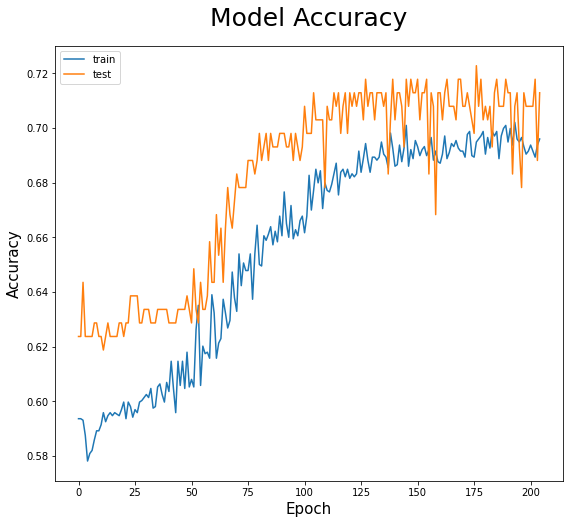

In [64]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

In the training and testing losses is the same case, the losses decrease together, the EarlyStopping keep them on a good limit, avoiding overfitting.

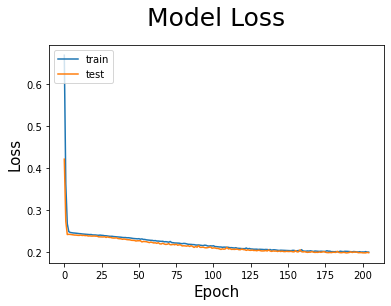

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')

ROC Curve

In [66]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [67]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

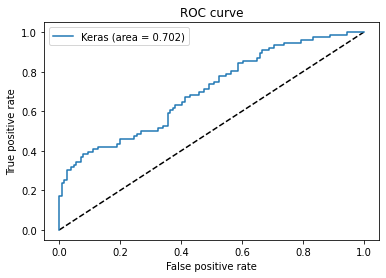

In [68]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [69]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix
We used a threshold of 0.5 to identify the water which are enough pure to drink. In the confusion matrix we can identify that our model better predicts non-potable water, this because from our dataset we have 1,200 rows with non-potable water and 811 rows with potable water, our model had the oportunity to learn with the same proportion.

In [71]:
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

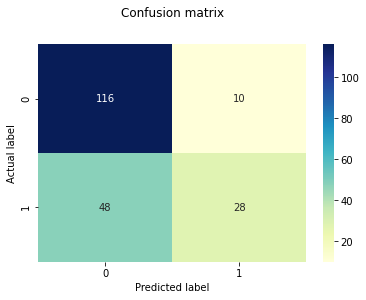

In [72]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Conclusions
The investigation of methods for identifying drinking water has a high relevance in the actuality beacuse the WHO has said that in 2025, half of the world population are going to live in lack of water.

The ANN developed in this notebook, doesn't have the best performance,I got less tha 70% in AUC in the ROC Curve, this because some factors: the small dataset, the quality and amount of explanatory variables we have, the diference between the number of rows that represent potable and non-potable water. However, the behavior of the loss function is really good. In this notebook we used a 0.5 treshold for the clasification, but in the real life we need to consult an expert for better results, this can save or damage people.